In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("finalTrain.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [3]:
df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26
45583,0x5fb2,RANCHIRES09DEL02,23.0,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10,17:15,Fog,Medium,2,Snack,scooter,1.0,No,Metropolitian,36


In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(45584, 20)

df.info()

## Finding the missing values

In [6]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [7]:
features_with_nan=[features for features in df .columns if df[features].isnull().sum()>=1]

In [8]:
features_with_nan

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Time_Orderd',
 'Weather_conditions',
 'Road_traffic_density',
 'multiple_deliveries',
 'Festival',
 'City']

In [9]:
# persentage of missing values 

In [10]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [11]:
for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().mean(),4)*100,'% missing values' )

Delivery_person_Age 4.07 % missing values
Delivery_person_Ratings 4.19 % missing values
Time_Orderd 3.8 % missing values
Weather_conditions 1.35 % missing values
Road_traffic_density 1.32 % missing values
multiple_deliveries 2.18 % missing values
Festival 0.5 % missing values
City 2.63 % missing values


In [12]:
data=df.copy()
for feature in features_with_nan:
    data[feature]=np.where(data[feature].isnull(),1,0)


## Numerical Variables

In [13]:
 Numerical_features=[feature for feature in df.columns if df[feature].dtype!='object']

In [14]:
Numerical_features

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)']

In [15]:
print(len(Numerical_features))
df[Numerical_features].head()

9


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2,3.0,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,1,1.0,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,1,1.0,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,0,0.0,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1,1.0,41


In [16]:
Categorical_features=[feature for feature in df.columns if df[feature].dtype=='object']

In [17]:
Categorical_features

['ID',
 'Delivery_person_ID',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

In [18]:
print(len(Categorical_features))
df[Categorical_features].head()

11


,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,0xcdcd,DEHRES17DEL01,12-02-2022,21:55,22:10,Fog,Jam,Snack,motorcycle,No,Metropolitian
1,0xd987,KOCRES16DEL01,13-02-2022,14:55,15:05,Stormy,High,Meal,motorcycle,No,Metropolitian
2,0x2784,PUNERES13DEL03,04-03-2022,17:30,17:40,Sandstorms,Medium,Drinks,scooter,No,Metropolitian
3,0xc8b6,LUDHRES15DEL02,13-02-2022,09:20,09:30,Sandstorms,Low,Buffet,motorcycle,No,Metropolitian
4,0xdb64,KNPRES14DEL02,14-02-2022,19:50,20:05,Fog,Jam,Snack,scooter,No,Metropolitian


In [19]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


## Graphical analysis of univariate 

<AxesSubplot:title={'center':'Road_traffic_density'}>

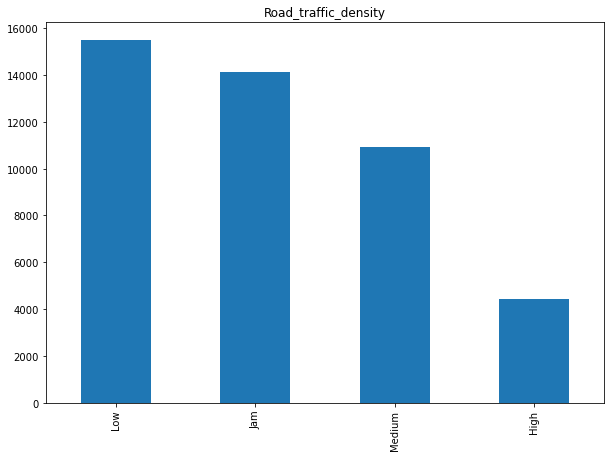

In [20]:
df['Road_traffic_density'].value_counts().plot(kind='bar',title= 'Road_traffic_density',figsize=(10,7) )


## from the above graph we can see that most  of the time  Road_traffic_density is low during the deliveries

<AxesSubplot:title={'center':'Type_of_order'}>

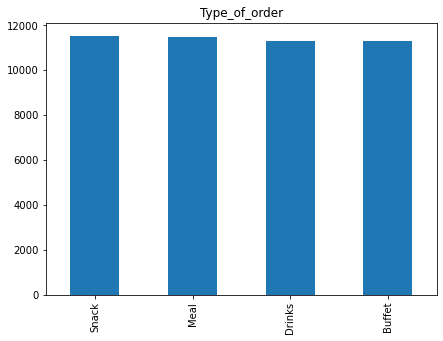

In [21]:
df['Type_of_order'].value_counts().plot(kind='bar',title= 'Type_of_order',figsize=(7,5) )


## we can see that all types of order is near about same 

<AxesSubplot:title={'center':'City'}>

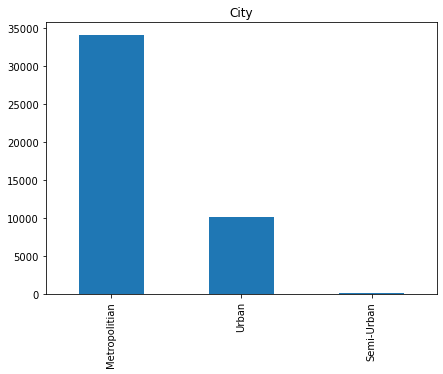

In [22]:
df['City'].value_counts().plot(kind='bar',title= 'City',figsize=(7,5) )

## from the graph we can clearly see that most of orders are from city Metropolitian and very less peoples are from the semi-urbans

<AxesSubplot:title={'center':'Delivery_person_Ratings'}>

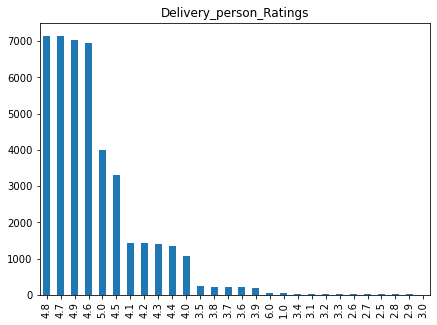

In [23]:
df['Delivery_person_Ratings'].value_counts().plot(kind='bar',title= 'Delivery_person_Ratings',figsize=(7,5) )

## Majority of peoples  ratings  are given  above  4.5 

<AxesSubplot:xlabel='Delivery_person_Age'>

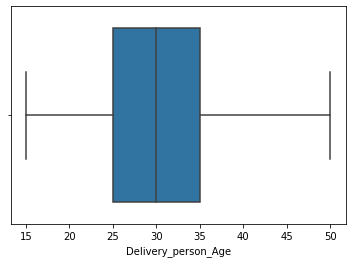

In [24]:
sns.boxplot(x=df['Delivery_person_Age'])

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Type_of_vehicle'>

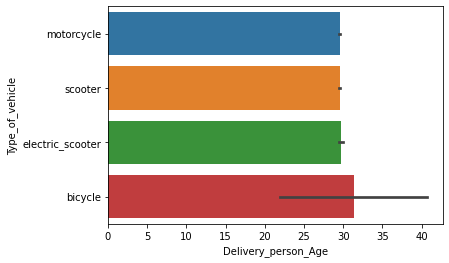

In [25]:
sns.barplot(data=df,x='Delivery_person_Age',y='Type_of_vehicle')

## from the above graph we can clearly see that the people whoes age is greater than 30 they have a bicycle

<AxesSubplot:xlabel='Weather_conditions', ylabel='Road_traffic_density'>

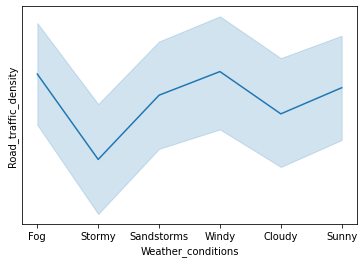

In [26]:
sns.lineplot(data=df,x='Weather_conditions',y='Road_traffic_density')

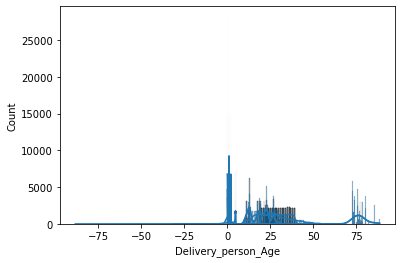

In [27]:
for i in Numerical_features:
    sns.histplot(data=df,x=i,kde=True)
   

In [28]:
df.shape

(45584, 20)

In [29]:
df=df.dropna().reset_index(drop=True)

In [30]:
df.shape

(41359, 20)

In [31]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

In [32]:
df['Order_Date']=pd.to_datetime(df['Order_Date'],infer_datetime_format=True)

In [33]:
df['Weather_conditions'].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny'],
      dtype=object)

In [34]:
df['multiple_deliveries'].unique()

array([3., 1., 0., 2.])

In [35]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [36]:
# df['education']=df['education'].str.replace(",","")

In [37]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [55]:
df.shape

(41359, 20)

In [60]:
x = df.drop('Time_taken (min)', axis= 1)
y = df['Time_taken (min)']

In [61]:
x.shape

(41359, 19)

In [62]:
y.shape

(41359,)

In [42]:
## divide the dataset into dependent and independent 
#x=df.iloc[:,:-1]
#y=df.iloc[:-1]

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer #handel missing values
#Pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [64]:
# Numerical Pipline
num_pipline = Pipeline(
 steps=[
 ("imputer",SimpleImputer(strategy="median")),
 ("scaler",StandardScaler())
 ]
)
# Catigorical Pipline
cato_pipline = Pipeline(
 steps=[
 ("imputer",SimpleImputer(strategy="most_frequent")),
 ("scaler",StandardScaler())
 ]
)
# Columns Transformer
preprocessor = ColumnTransformer([
 ("num_pipline",num_pipline,Numerical_features),
 ("cato_pipline",cato_pipline,Categorical_features)
])

In [45]:
#print(x.shape)
#print(y.shape)

(41359, 19)
(41358, 20)


In [107]:
So this error occurs when the number of samples in the X and y features is not the same. The error message suggests that the number of samples in the X feature is 45584, while the number of samples in the y feature is 45583.


To fix this error, you can check the shapes of your X and y features using the shape attribute. Make sure that the number of samples in the X feature matches the number of samples in the y feature.

You can refer to this code example for the same:

import numpy as np
from sklearn.model_selection import train_test_split

# X feature with shape (45584, 10)
X = np.random.rand(45584, 10)

# y feature with shape (45583,)
y = np.random.randint(0, 2, size=45583)

# Check the shapes of X and y
print(X.shape)
print(y.shape)

# Fix the error by discarding the last sample in X
X = X[:-1, :]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)

Here, we first create X and y features with shapes (45584, 10) and (45583,), respectively. We then check the shapes of X and y and find that they are not consistent. To fix the error, we discard the last sample in X to make its shape consistent with y. We then split the data into train and test sets using train_test_split().So this error occurs when the number of samples in the X and y features is not the same. The error message suggests that the number of samples in the X feature is 45584, while the number of samples in the y feature is 45583.


To fix this error, you can check the shapes of your X and y features using the shape attribute. Make sure that the number of samples in the X feature matches the number of samples in the y feature.

You can refer to this code example for the same:

import numpy as np
from sklearn.model_selection import train_test_split

# X feature with shape (45584, 10)
X = np.random.rand(45584, 10)

# y feature with shape (45583,)
y = np.random.randint(0, 2, size=45583)

# Check the shapes of X and y
print(X.shape)
print(y.shape)

# Fix the error by discarding the last sample in X
X = X[:-1, :]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)

Here, we first create X and y features with shapes (45584, 10) and (45583,), respectively. We then check the shapes of X and y and find that they are not consistent. To fix the error, we discard the last sample in X to make its shape consistent with y. We then split the data into train and test sets using train_test_split().

SyntaxError: invalid syntax (2645904083.py, line 1)

In [65]:
import numpy as np
from sklearn.model_selection import train_test_split

In [47]:
# X feature with shape (45584, 10)
# X = np.random.rand(45584, 10)

In [48]:
# y feature with shape (45583,)
# y= np.random.randint(0, 2, size=45583)


In [50]:
# Check the shapes of X and y
print(x.shape)
print(y.shape)

(41359, 19)
(41358, 20)


In [45]:
# Fix the error by discarding the last sample in X
# X = X[:-1, :]

In [66]:
x.shape

(41359, 19)

In [67]:
y.shape

(41359,)

In [68]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=32)

In [70]:
print(x.shape)
print(y.shape)

(41359, 19)
(41359,)


In [71]:
X_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
18961,0x843c,BANGRES04DEL02,36.0,4.1,12.980410,77.640489,13.060410,77.720489,2022-03-18,21:10,21:20,Sunny,Jam,0,Meal,motorcycle,1.0,No,Metropolitian
513,0xa14d,MYSRES01DEL02,32.0,3.6,12.311072,76.654878,12.441072,76.784878,2022-06-04,20:25,20:30,Stormy,Jam,2,Meal,scooter,1.0,No,Urban
20522,0x6bbc,COIMBRES17DEL01,30.0,4.5,11.026117,76.944652,11.136117,77.054652,2022-03-27,17:40,17:55,Sunny,Medium,0,Drinks,motorcycle,1.0,No,Metropolitian
40661,0x3aeb,JAPRES07DEL03,26.0,4.5,26.766536,75.837333,26.826536,75.897333,2022-03-26,19:10,19:20,Fog,Jam,0,Snack,motorcycle,1.0,No,Metropolitian
24645,0xd6bb,GOARES20DEL02,31.0,4.6,0.000000,0.000000,0.080000,0.080000,2022-02-18,17:20,17:25,Windy,Medium,1,Drinks,motorcycle,1.0,No,Urban


In [72]:
x.shape

(41359, 19)

In [75]:
X_train.shape,X_test.shape

((27710, 19), (13649, 19))

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler

In [82]:
scaler.fit(X_train)

TypeError: fit() missing 1 required positional argument: 'X'